In [1]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#load data sets into dataframes
lyft_df = pd.read_csv('Data_files/lyft.csv')
rideshare_df = pd.read_csv('Data_files/rideshare_data.csv')
uber_df = pd.read_csv('Data_files/uber.csv')


In [31]:
#check headers for variable names
uber_df.head()

,id,hour,day,month,source,destination,cab_type,name,price,distance,...,visibility,temperatureHigh,temperatureLow,dewPoint,windBearing,cloudCover,uvIndex,visibility.1,moonPhase,weekday
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,22,30,11,North End,West End,Uber,UberXL,12.0,1.11,...,9.833,42.52,31.71,27.31,281,1.00,0,9.833,0.79,Fri
1,23f145da-f0c1-4d1f-a184-496bc003a7db,10,13,12,North End,West End,Uber,Black,16.0,1.11,...,9.831,33.83,27.27,10.87,2,0.03,0,9.831,0.21,Thu
2,357559cb-8c58-4278-a41a-e33b2e0997a3,19,13,12,North End,West End,Uber,UberX,7.5,1.11,...,9.959,33.83,27.27,18.66,76,0.64,0,9.959,0.21,Thu
3,50ef1165-9d23-416c-a65c-18906207b295,23,16,12,North End,West End,Uber,WAV,7.5,1.11,...,4.054,43.83,34.25,37.56,57,1.00,0,4.054,0.30,Sun
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,0,14,12,North End,West End,Uber,Black SUV,26.0,1.11,...,10.000,33.83,27.27,20.53,173,0.91,0,10.000,0.21,Fri


Text(0.5, 1.0, 'Number of Rides to Different Areas of Boston')

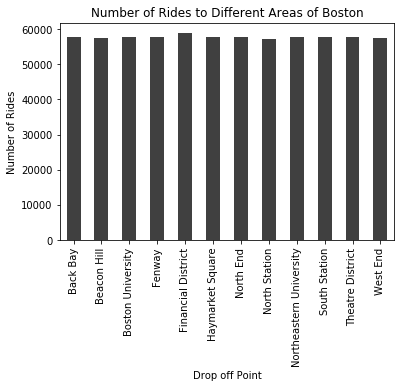

In [30]:
#Spencer's code 
#group by destination and get counts to create a bar graph that will show what frequently each destination in used.
grouped_destination = rideshare_df.groupby(['destination'])
dest_count = grouped_destination.count()
#simple bar graph created with title and labels
dest_count['id'].plot(kind = 'bar', alpha = 0.75, align = 'center', color = 'k')
plt.xlabel('Drop off Point')
plt.ylabel('Number of Rides')
plt.title('Number of Rides to Different Areas of Boston')



In [27]:
#chi-squared test on whether some destinations see more ride share traffic than others
#create dataframe of the observed values for each drop off point
chi_full_data = pd.DataFrame({'observed ride count':dest_count['id']})
#create variables that will that will calculate expected values, assuming there is no difference between drop off points 
dest_total = len(chi_full_data)
total_trips = chi_full_data['observed ride count'].sum()
#Add expected values to dataframe
chi_full_data['Expected ride count'] = total_trips / dest_total
#run chi-squared test
stats.chisquare(chi_full_data['observed ride count'], chi_full_data['Expected ride count'])

Power_divergenceResult(statistic=30.554149574863185, pvalue=0.0012960638184287632)

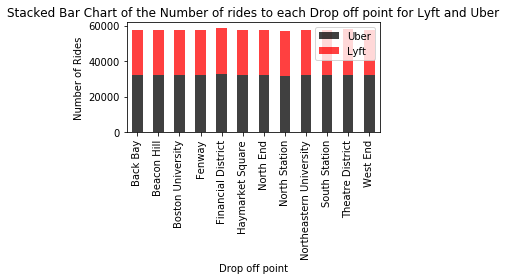

In [28]:
#create a a dataframe with the total count uber and lyft drop off points
lyft_count = lyft_df.groupby(['destination']).count()
uber_count = uber_df.groupby(['destination']).count()
merge_count = pd.DataFrame({'Uber':uber_count['id'], 'Lyft':lyft_count['id']})
#created stack graph to show how many dropoffs each service complete in each destination
merge_count.plot(kind='bar', stacked =True, color = ['k','r'], alpha = .75)
plt.xlabel('Drop off point')
plt.ylabel('Number of Rides')
plt.title('Stacked Bar Chart of the Number of rides to each Drop off point for Lyft and Uber')
plt.tight_layout()

In [29]:
#run chi_squared test to see if the difference between services is expected or not
#calculate observed difference in drop offs by each service in each destination
merge_count['observed difference'] = merge_count['Uber']-merge_count['Lyft']
#calculate expected difference between the two services in each area if destination has no affect
difference_total = merge_count['observed difference'].sum()
expected = difference_total / dest_total
merge_count['expected difference'] = expected
#run chi-squared test
stats.chisquare(merge_count['observed difference'], merge_count['expected difference'])

Power_divergenceResult(statistic=11.523595936361893, pvalue=0.40049567568513944)

In [ ]:
#Adam's code

In [ ]:
#Rory's code
